<a href="https://colab.research.google.com/github/Ashish10Das/Deep_Learning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

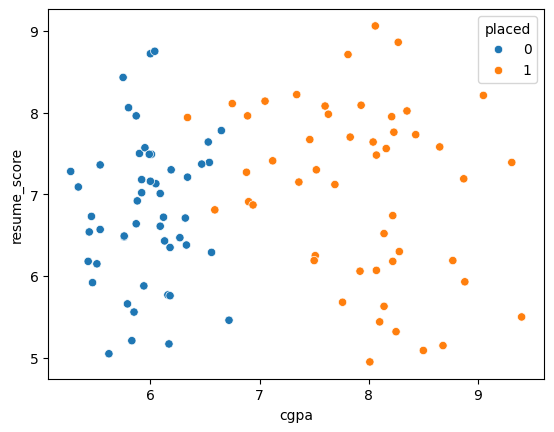

In [ ]:
sns.scatterplot(x='cgpa', y='resume_score', data=df , hue='placed')

In [ ]:
X= df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [ ]:
print(Y)

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: placed, Length: 100, dtype: int64


In [ ]:
from sklearn.linear_model import Perceptron
p= Perceptron()
p.fit(X,Y)

Perceptron()

Assuming we're working with a perceptron model (likely from scikit-learn), perceptron.coef_ represents the weights associated with each input feature of your model.

Key Points:

Weights and Linear Decision Boundary: A perceptron learns a linear decision boundary to separate classes in your data. The coef_ attribute holds the coefficients (weights) of this linear equation. Each weight corresponds to the influence of a particular input feature on the decision-making process.
Shape: The shape of perceptron.coef_ is typically (1, n_features), where n_features is the number of features in your input data.
Interpretation: Larger (absolute) values of weights indicate that the corresponding features have a stronger impact on the classification decision. The sign of the weight (positive or negative) suggests whether the feature contributes positively or negatively towards belonging to a particular class.
Example (Hypothetical):

Let's say you're using a perceptron to predict whether a student will pass an exam based on two features: "hours studied" and "practice problems solved." If perceptron.coef_ is something like [[3.2, 1.5]], it means:

The feature "hours studied" has a stronger positive influence on predicting a pass (weight 3.2).
The feature "practice problems solved" also positively contributes to predicting a pass, but to a lesser extent (weight 1.5).

In [ ]:
p.coef_

array([[ 40.26, -36.  ]])

Assuming p is your trained perceptron model, p.intercept_ represents the bias term or intercept of the linear decision boundary learned by the perceptron.

Understanding Bias:

Think of the bias as a "base value" or "offset" in the decision-making process. In the equation of a line (y = mx + c), it's analogous to the constant term 'c'. The bias shifts the entire decision boundary up or down, allowing the perceptron to make more flexible classifications.

In the Context of Perceptrons:

Without Bias: If there were no bias term, the decision boundary would always have to pass through the origin (0, 0). This could limit the perceptron's ability to separate data that isn't centered around the origin.
With Bias: The bias term provides the necessary flexibility, enabling the decision boundary to be positioned optimally to separate the classes effectively.
Shape and Access:

Similar to coef_, p.intercept_ is usually a NumPy array. Since it's a single value (the intercept), its shape would be (1,)

In [ ]:
p.intercept_

array([-25.])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

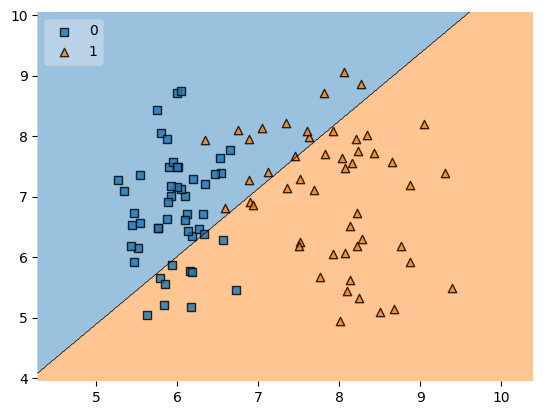

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, Y.values, clf=p, legend=2)

**Perceptron TRICK**

In [8]:
from sklearn.datasets import make_classification

In [9]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

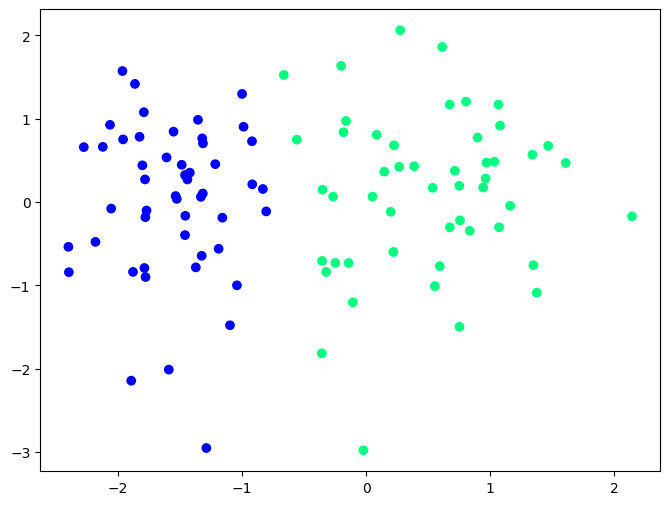

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [19]:
import numpy as np

def perceptron(X,y):
  X= np.insert(X,0,1,axis=1)
  weights= np.ones(X.shape[1])
  lr=0.1

  for i in range(1000):
    j= np.random.randint(0,100)
    # Calculate the dot product for the selected sample
    z = np.dot(X[j], weights)
    y_hat= step(z) # Pass the single value to step
    weights = weights + lr*(y[j]-y_hat)*X[j]
  return weights[1:], weights[0] # Return the intercept (bias) as well

def step(z):
  return 1 if z>0 else 0

# Assuming X and y are defined somewhere in your code
coef_, intercept_ = perceptron(X, y)
print("Intercept: ", intercept_)
print("Coefficients: ", coef_)


Intercept:  1.0
Coefficients:  [1.25671227 0.0771601 ]


This Python code defines a function called step. This function implements a step function, which is a common activation function used in perceptrons and other artificial neural networks.

Breakdown:

def step(z):: This line defines a function named step that takes a single argument z.

return 1 if z > 0 else 0: This line is a concise way of implementing the step function logic:

If the input value z is greater than 0, the function returns 1.
Otherwise (if z is less than or equal to 0), the function returns 0.
Purpose in Perceptrons:

In the context of perceptrons, the step function serves as an activation function that introduces non-linearity into the model. It takes the weighted sum of inputs (plus bias) and "activates" the neuron (outputting 1) if the weighted sum exceeds a certain threshold (0 in this case), otherwise it remains inactive (outputting 0).

This simple on/off behavior allows perceptrons to model complex decision boundaries and classify data into different categories

In [20]:
m = -(coef_[0]/coef_[1])
b= -(intercept_/coef_[1])

In [21]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

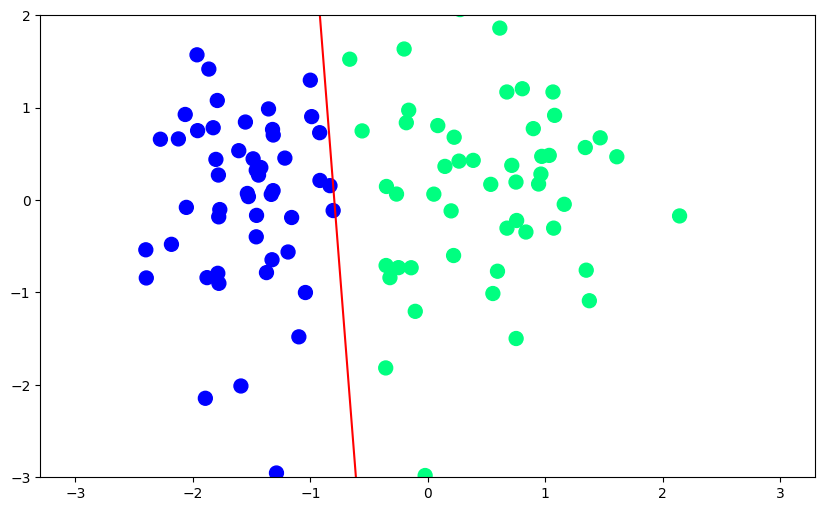

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, 'r')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s = 100)
plt.ylim(-3,2)
plt.show()